# Binary Search Tree
A new search method after 1.Binary search 2.Hash search
###  bst property
A binary search tree relies on the **property** that **keys** that are **less than the parent are found in the left subtree**, and keys that are **greater than** the parent are found in the **right subtree**.
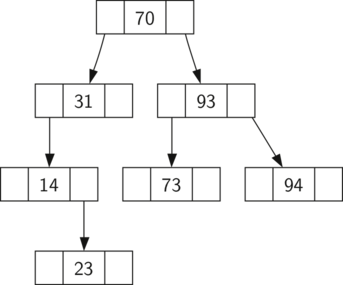
All of the keys in the left subtree are less than the key in the root. All of the keys in the right subtree are greater than the root.

### Implement 
To implement the binary search tree, we will use the **nodes and references approach** similar to the one we used to implement the **linked list**, and the expression tree. 
- one class Binary Search Tree : reference to the TreeNode
- second class Tree node: the root of binary search tree

- 1.The put method is a method of the BinarySearchTree class.
 - check to see if the tree already has a root.
 - if no root put a new node and `install it as a root`
 - if has root, call _put ro search position
- 2.With the put method defined, we can easily overload the [] operator for assignment by having the \__setitem__ method call the put method
- 3.get method to retrieve a value
- 4.in operation by writting \__contain__ method
- 5.**the most challenging method in the binary search tree, the deletion of a key**
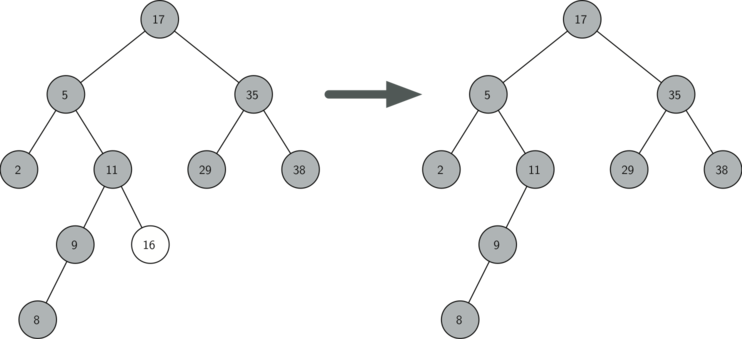 no child
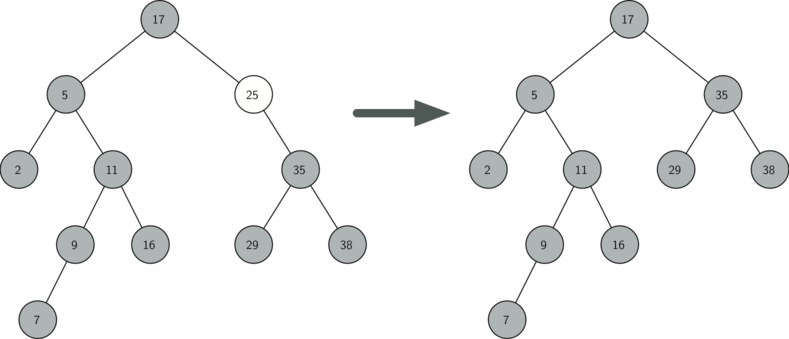 one child
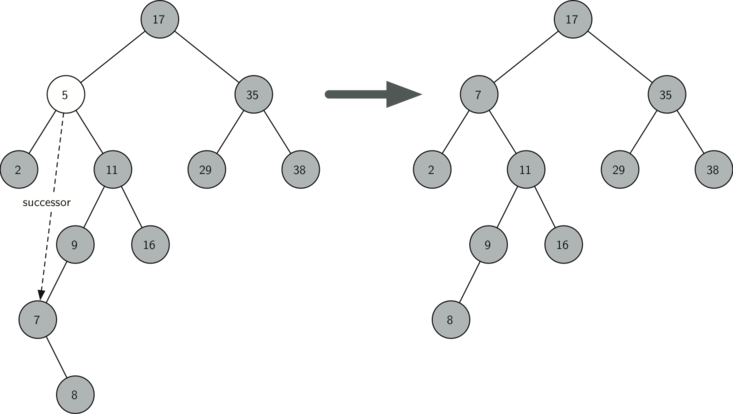 **two children(most difficult case to handle)**

we need to find a successor to replace(not delete the node, just modify the key and value) the delete node.

Notice that we make use of the helper methods find_successor and find_min to find the successor. To remove the successor, we make use of the method splice_out.

In [4]:
## BinaryTree
class BinarySearchTree:
    
    def __init__(self):
        self.root = None
        self.size = 0
    
    '''
    Help function
    '''
    def __len__(self):
        return self.size
    
    def size(self):
        return self.size
    
    def __iter__(self):
        return self.root.__iter__()
    
    def put(self,key,value):
        if self.root:
            self._put(key,value,self.root)
        else:
            self.root = TreeNode(key,value)
        self.size += 1
        
    def _put(self, key, value, current_node):
        if key < current_node.key:
            if current_node.left_child:
                self._put(key, value, current_node.left_child)
            else:
                current_node.left_child = TreeNode(key,value,parent = current_node)
        else:
            if current_node.right_child:  # there is a right node
                self._put(key,value,current_node.right_child)
            else:  # if don't have right, this node is right
                current_node.right_child = TreeNode(key,value,parent=current_node)
                
    def __setitem__(self,key,value):
        self.put(key,value)
        
    def get(self,key):
        if self.root:
            result = self._get(key,self.root)
            if result:
                return result.value
        return None
    
    def _get(self, key, current_node):
        if not current_node:
            return None
        if not current_node.key == key:
            return current_node
        elif key < current_node.key:
            return self._get(key,current_node.left_child)
        else:
            return self._get(key,current_node.right_child)
        
    def __getitem__(self,key):
        return self.get(key)
    
    def __contains__(self,key):
        return bool(self._get(key,self.root))
    
    def delete(self, key):
        if self.size > 1:
            node_to_remove = self._get(key,self.root)
            if node_to_remove:
                self._delete(node_to_remove)
                self.size = self.size - 1
            else:
                raise KeyError("Error, key not in tree")
        # only one node in a tree, only need remove the root of the tree
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size = self.size - 1
        else:
            raise KeyError("Error, key not in tree")
            
    def _delete(self, current_node):
        if current_node.is_leaf():  # removing a leaf
            if current_node == current_node.parent.left_child:
                current_node.parent.left_child = None
            else:
                current_node.parent.right_child = None
        elif current_node.has_children():  # removing a node with two children
            successor = current_node.find_successor()
            successor.splice_out()
            current_node.key = successor.key
            current_node.value = successor.value
        else:  # removing a node with one child
            if current_node.left_child: # the delete node's child is left
                if current_node.is_left_child(): # the deleted node is in left
                    current_node.left_child.parent = current_node.parent   # it's left child's new parent is its parent
                    current_node.parent.left_child = current_node.left_child  # it's parent's left child is its left child
                elif current_node.is_right_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.left_child
                else: # the node have no parent, so it must be a root
                    current_node.replace_value(
                        current_node.left_child.key,
                        current_node.left_child.value,
                        current_node.left_child.left_child,
                        current_node.left_child.right_child,
                    )
            else:
                if current_node.is_left_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.right_child
                elif current_node.is_right_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.right_child
                else:
                    current_node.replace_value(
                        current_node.right_child.key,
                        current_node.right_child.value,
                        current_node.right_child.left_child,
                        current_node.right_child.right_child,
                    )
            
    def __delitem__(self, key):
        self.delete(key)
    
    

In [2]:
class TreeNode:
    def __init__(self,key,value,left=None, right=None,parent = None):
        self.key = key
        self.value = value
        self.left_child = left
        self.right_child = right
        self.parent = parent
    
    '''
    self.parent is this obj has parent, and parent.left_child == self is to say 
    obj is his parent's left child
    '''
    def is_left_child(self):
        return self.parent and self.parent.left_child is self
    
    def is_right_child(self):
        return self.parent and self.parent.right_child is self
    
    '''
    if self.parent is None(False), This obj is root
    '''
    def is_root(self):
        return not self.parent
    
    '''
    This obj does not have any child, so it is leaf
    '''
    def is_leaf(self):
        return not(self.right_child or self.left_child)  # no child node
    
    def has_a_child(self):
        return self.right_child and self.left_child
    
    def replace_value(self,key,value,left,right):
        self.key = key
        self.value = value 
        self.left_child = left
        self.right_child = right
        if self.left_child:
            self.left_child.parent = self
        if self.right_child:
            self.right_child.parent = self
            
    def find_successor(self):
        successor = None
        if self.right_child:
            successor = self.right_child.find_min()
        else:
            if self.parent:
                if self.is_left_child():
                    successor = self.parent
                else:
                    self.parent.right_child = None
                    successor = self.parent.find_successor()
                    self.parent.right_child = self
        return successor

    def find_min(self):
        current = self
        while current.left_child:
            current = current.left_child
        return current

    def splice_out(self):
        if self.is_leaf():
            if self.is_left_child():
                self.parent.left_child = None
            else:
                self.parent.right_child = None
        elif self.has_a_child():
            if self.left_child:
                if self.is_left_child():
                    self.parent.left_child = self.left_child
                else:
                    self.parent.right_child = self.left_child
                self.left_child.parent = self.parent
            else:
                if self.is_left_child():
                    self.parent.left_child = self.right_child
                else:
                    self.parent.right_child = self.right_child
                self.right_child.parent = self.parent

#### put
O(logn) <---> O(n)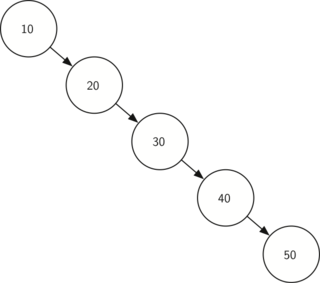the worst case